In [ ]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

nltk.download('punkt')

data = pd.read_csv('badwords.csv')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,@nameisnani nuvv chala bagunnav
1,1,3,0,0,3,1,"Handsome hunk, vacchu neevu naa naeta ayyaava"
2,2,3,0,0,3,1,melu..... ilanti rachanalu chala avasaram ....
3,3,3,0,0,1,1,Vera level BGM .. trailer anekaṁ kikku icchindi
4,4,3,0,0,6,1,meeru emi chestunnaru?!!!! aa talli !!!!
...,...,...,...,...,...,...,...
1494,1525,3,0,0,3,1,Alaram mogutu untadi... Kani legamu..
1495,1526,3,0,0,3,1,Maa oori bhasha ante aa maatram untaadi leir...
1496,1527,3,0,0,3,2,"Bro.. Indaake virupaksha movie chusi, dhaduchu..."
1497,1528,3,0,0,3,1,Yedavalaku Assalu taste ledhu.... Em padoite a...


In [ ]:
import nltk
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))

def preprocess(tweet):
    tokens = nltk.word_tokenize(tweet.lower())
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(tokens)

data['tweet'] = data['tweet'].apply(preprocess)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,nameisnani nuvv chala bagunnav
1,1,3,0,0,3,1,handsome hunk vacchu neevu naa naeta ayyaava
2,2,3,0,0,3,1,melu ilanti rachanalu chala avasaram
3,3,3,0,0,1,1,vera level bgm trailer anekaṁ kikku icchindi
4,4,3,0,0,6,1,meeru emi chestunnaru aa talli
...,...,...,...,...,...,...,...
1494,1525,3,0,0,3,1,alaram mogutu untadi kani legamu
1495,1526,3,0,0,3,1,maa oori bhasha ante aa maatram untaadi leira ...
1496,1527,3,0,0,3,2,bro indaake virupaksha movie chusi dhaduchukon...
1497,1528,3,0,0,3,1,yedavalaku assalu taste ledhu em padoite ade v...


In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['tweet'])
y = data['class']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
svm_model = svm.SVC(kernel='linear', C=1, gamma=1)
svm_model.fit(X_train, y_train)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


MultinomialNB()

In [ ]:
svm_pred = svm_model.predict(X_test)


svm_cm = confusion_matrix(y_test, svm_pred)


svm_report = classification_report(y_test, svm_pred, labels=[0,1,2], target_names=['hate_speech', 'offensive_language', 'neither'])


print('SVM Confusion Matrix:\n', svm_cm)
print('SVM Classification Report:\n', svm_report)




SVM Confusion Matrix:
 [[  2  19   0]
 [  1 217   6]
 [  3  47   5]]
SVM Classification Report:
                     precision    recall  f1-score   support

       hate_speech       0.33      0.10      0.15        21
offensive_language       0.77      0.97      0.86       224
           neither       0.45      0.09      0.15        55

          accuracy                           0.75       300
         macro avg       0.52      0.38      0.39       300
      weighted avg       0.68      0.75      0.68       300



In [ ]:
nb_pred = nb_model.predict(X_test)
nb_cm = confusion_matrix(y_test, nb_pred)
nb_report = classification_report(y_test, nb_pred, labels=[0,1,2], target_names=['hate_speech', 'offensive_language', 'neither'])
print('Naive Bayes Confusion Matrix:\n', nb_cm)
print('Naive Bayes Classification Report:\n', nb_report)

Naive Bayes Confusion Matrix:
 [[  2  18   1]
 [ 12 185  27]
 [  5  41   9]]
Naive Bayes Classification Report:
                     precision    recall  f1-score   support

       hate_speech       0.11      0.10      0.10        21
offensive_language       0.76      0.83      0.79       224
           neither       0.24      0.16      0.20        55

          accuracy                           0.65       300
         macro avg       0.37      0.36      0.36       300
      weighted avg       0.62      0.65      0.63       300



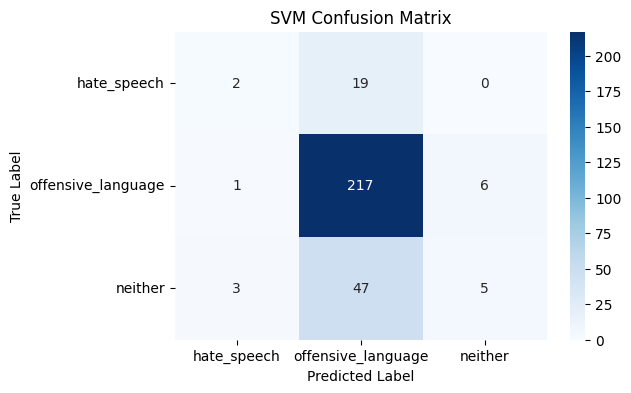

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot SVM confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(svm_cm, annot=True, cmap="Blues", fmt="d", xticklabels=['hate_speech', 'offensive_language', 'neither'], yticklabels=['hate_speech', 'offensive_language', 'neither'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()




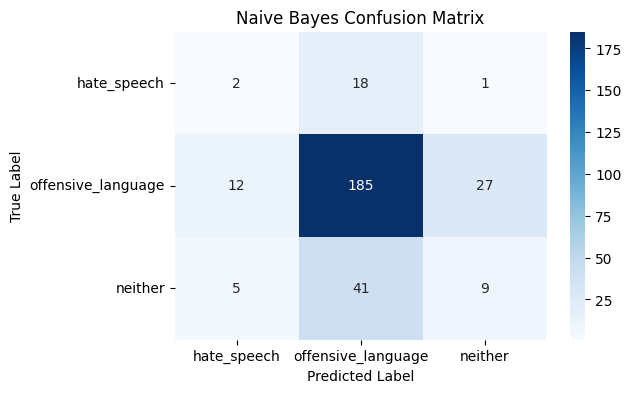

In [ ]:
# Plot Naive Bayes confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(nb_cm, annot=True, cmap="Blues", fmt="d", xticklabels=['hate_speech', 'offensive_language', 'neither'], yticklabels=['hate_speech', 'offensive_language', 'neither'])
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

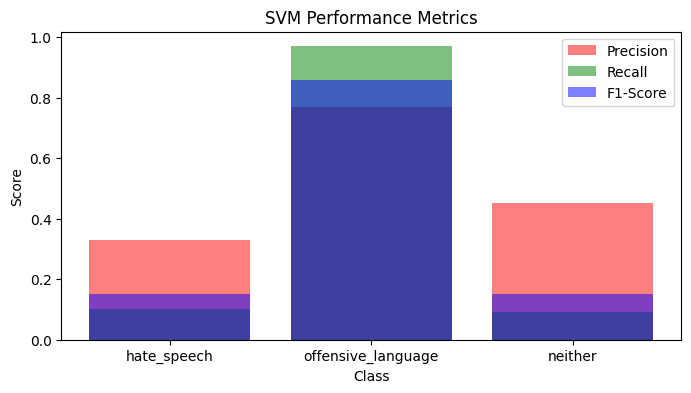

In [ ]:
# Extract precision, recall, and f1-score from SVM classification report
svm_scores = svm_report.split('\n')[2:-5]
svm_precision = [float(score.split()[1]) for score in svm_scores]
svm_recall = [float(score.split()[2]) for score in svm_scores]
svm_f1_score = [float(score.split()[3]) for score in svm_scores]

# Create bar chart for SVM precision, recall, and f1-score
plt.figure(figsize=(8,4))
x_labels = ['hate_speech', 'offensive_language', 'neither']
plt.bar(x_labels, svm_precision, color='r', alpha=0.5, label='Precision')
plt.bar(x_labels, svm_recall, color='g', alpha=0.5, label='Recall')
plt.bar(x_labels, svm_f1_score, color='b', alpha=0.5, label='F1-Score')
plt.title('SVM Performance Metrics')
plt.xlabel('Class')
plt.ylabel('Score')
plt.legend(loc='upper right')
plt.show()



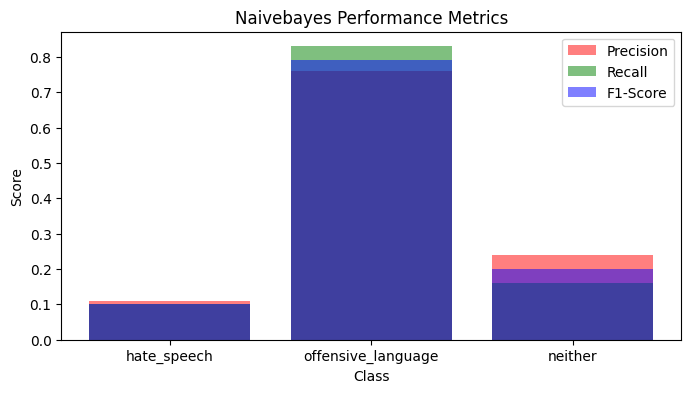

In [ ]:

# Extract precision, recall, and f1-score from Naive Bayes classification report
nb_scores = nb_report.split('\n')[2:-5]
nb_precision = [float(score.split()[1]) for score in nb_scores]
nb_recall = [float(score.split()[2]) for score in nb_scores]
nb_f1_score = [float(score.split()[3]) for score in nb_scores]

# Create bar chart for Naive Bayes precision, recall, and f1-score
plt.figure(figsize=(8,4))
x_labels = ['hate_speech', 'offensive_language', 'neither']
plt.bar(x_labels, nb_precision, color='r', alpha=0.5, label='Precision')
plt.bar(x_labels, nb_recall, color='g', alpha=0.5, label='Recall')
plt.bar(x_labels, nb_f1_score, color='b',alpha=0.5, label='F1-Score')
plt.title('Naivebayes Performance Metrics')
plt.xlabel('Class')
plt.ylabel('Score')
plt.legend(loc='upper right')
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

# Load the dataset
data = pd.read_csv('badwords.csv')

# Separate features (tweets) and labels (classes)
tweets = data['tweet']
labels = data['class']

# Create a pipeline with a TF-IDF vectorizer and a linear SVM classifier
pipeline = make_pipeline(
    TfidfVectorizer(),
    LinearSVC()
)

# Perform k-fold cross-validation
k = 5  # Number of folds
scores = cross_val_score(pipeline, tweets, labels, cv=k, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, score in enumerate(scores):
    print(f'Fold {fold + 1}: {score}')

# Print the average accuracy across all folds
average_accuracy = scores.mean()
print(f'Average accuracy: {average_accuracy}')


Fold 1: 0.7433333333333333
Fold 2: 0.74
Fold 3: 0.7233333333333334
Fold 4: 0.6466666666666666
Fold 5: 0.7324414715719063
Average accuracy: 0.717154960981048


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
